In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array


In [2]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')

In [3]:
fa = open('train-images-idx3-ubyte.gz', 'wb') 
fa.write(request.read())

9912422

In [4]:
fa.close()

In [5]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')

fa = open('t10k-images-idx3-ubyte.gz', 'wb') 
fa.write(request.read())
fa.close()

In [6]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')

fa = open('train-labels-idx1-ubyte.gz', 'wb') 
fa.write(request.read())
fa.close()

In [7]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

fa = open('t10k-labels-idx1-ubyte.gz', 'wb') 
fa.write(request.read())
fa.close()

In [8]:
fa = open("sample.txt", "r") 
fa.read()
fa.close()

In [9]:
with open('sample.txt') as fa:
    fa.read()

In [10]:
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

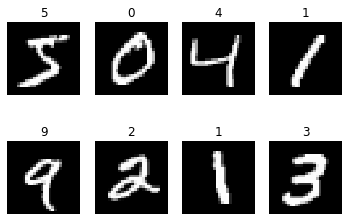

In [11]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

In [12]:
samples_0__1 = np.where((labels==0)| (labels==1))[0]
images_0_1 = img[samples_0__1]
labels_0_1 = labels[samples_0__1]

samples_0__1_test = np.where((labels_test==0)| (labels_test==1))[0]
images_0_1_test = img_test[samples_0__1_test].reshape((-1, rows*cols))
labels_0_1_test = labels[samples_0__1_test]

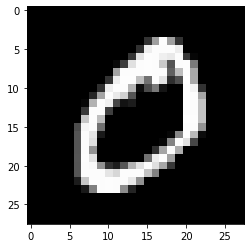

In [13]:
sample_0 = np.where((labels == 0))[0][0]
plt.imshow(img[sample_0], cmap='gray')
plt.show()

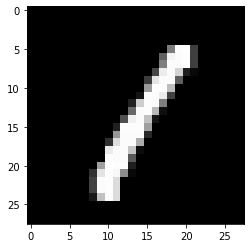

In [14]:
sample_0 = np.where((labels == 1))[0][0]
plt.imshow(img[sample_0], cmap='gray')
plt.show()

In [15]:
images_0_1 = images_0_1.reshape((-1, rows*cols))

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X=images_0_1, y=labels_0_1)

In [17]:
model = LogisticRegression(solver='liblinear')
model.fit(X=images_0_1, y=labels_0_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.score(X=images_0_1, y=labels_0_1)

1.0

In [19]:
model.predict(images_0_1)[:2]

array([0, 1], dtype=uint8)

In [20]:
model.predict_proba(images_0_1)[:2]

array([[9.99999999e-01, 9.89532694e-10],
       [4.56461402e-09, 9.99999995e-01]])

In [21]:
model.score(X=images_0_1_test, y=labels_0_1_test)

0.11536643026004728